In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

df=pd.read_csv('income.csv')
df


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


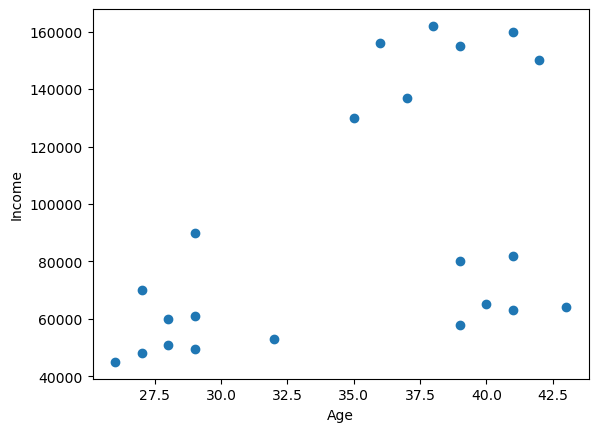

In [354]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [355]:
Km=KMeans(n_clusters=3)
y_pred=Km.fit_predict(df.drop(['Name'],axis=1))
y_pred

c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [356]:
df['cluster']=y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,2


In [357]:
Km.cluster_centers_

array([[3.92000000e+01, 1.56600000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.60000000e+01, 1.33500000e+05]])

In [358]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


C:\Users\adelz\AppData\Local\Temp\ipykernel_18704\106547545.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


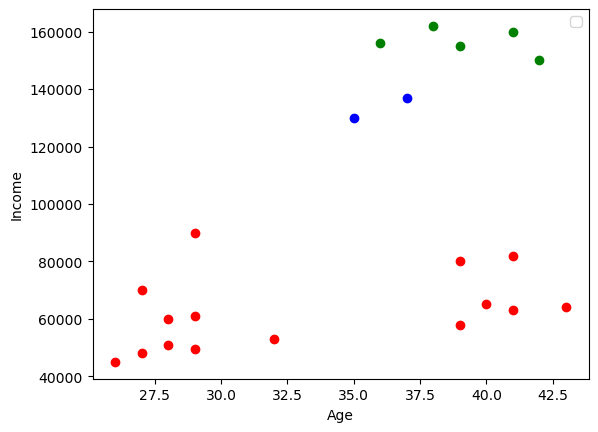

In [359]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [360]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,2


In [361]:
Km=KMeans(n_clusters=3)
y_pred=Km.fit_predict(df.drop(['Name'],axis='columns'))
y_pred

c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [362]:
Km.cluster_centers_

array([[ 7.76470588e-01,  9.53846154e-01, -1.11022302e-16],
       [ 1.37254902e-01,  1.16334283e-01,  1.00000000e+00],
       [ 7.86764706e-01,  3.40811966e-01,  1.25000000e+00]])

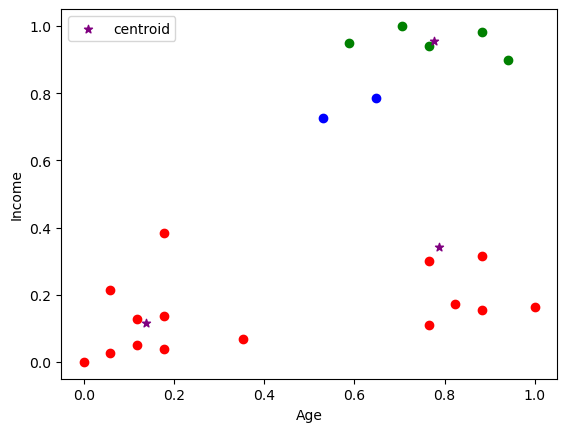

In [363]:
df_1=df[df.cluster==0]
df_2=df[df.cluster==1]
df_3=df[df.cluster==2]

plt.scatter(df_1.Age,df_1['Income($)'],color='green')
plt.scatter(df_2.Age,df_2['Income($)'],color='red')
plt.scatter(df_3.Age,df_3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()



In [364]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame with 'Age' and 'Income($)' columns
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
    km.fit(df[['Age', 'Income($)']])  # Use lowercase km consistently
    sse.append(km.inertia_)  # Access inertia_ on the fitted km object

print(sse)

[5.434011511988178, 2.3456144914725936, 0.4750783498553096, 0.3698658919234833, 0.2829404587160481, 0.23014252862240325, 0.2054876962752632, 0.1471853679399594, 0.13246345557512862]


c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

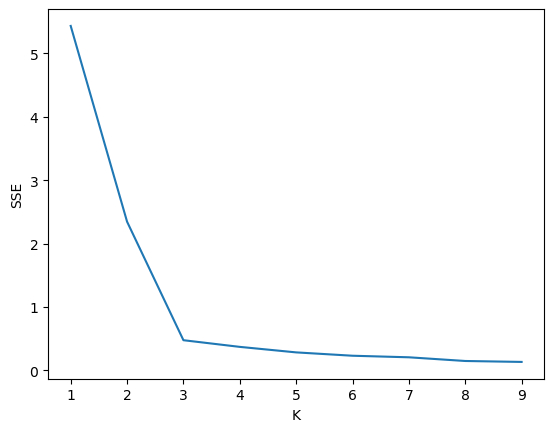

In [365]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)